## Audio Processing Basics

Import wave module

In [1]:
import wave

In [2]:
obj = wave.open("hadithi.wav", "rb")


In [3]:
print("Number of channels", obj.getnchannels())
print("Sample widths", obj.getsampwidth())
print("Frame rate", obj.getframerate())
print("Number of frames", obj.getnframes())
print("Parameters", obj.getparams())

Number of channels 2
Sample widths 2
Frame rate 48000
Number of frames 3879936
Parameters _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=3879936, comptype='NONE', compname='not compressed')


In [4]:
t_audio = obj.getnframes() / obj.getframerate()
print(t_audio)

80.832


In [5]:
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))

<class 'bytes'> <class 'int'>
15519744


In [6]:
obj.close()

In [7]:
obj_new = wave.open("hadithi_new.wav", "wb")

In [8]:
obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(48000.0)
obj_new.writeframes(frames)

In [9]:
obj_new.close()

## Plot a wave signal

In [10]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
obj = wave.open("hadithi.wav", "rb")

In [12]:
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)


In [13]:
obj.close()

In [17]:
# Calculate the duration in seconds
t_audio = n_samples / sample_freq
print(t_audio)

80.832


In [18]:
# Convert the signal bytes to an array of int16 values
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
# Calculate the time values for plotting
times = np.linspace(0, t_audio, num=len(signal_array))  # Use len(signal_array) instead of n_samples


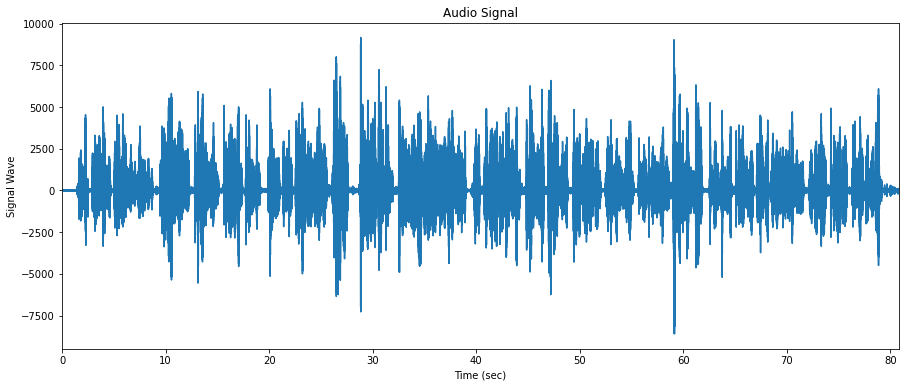

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal Wave")
plt.xlabel("Time (sec)")
plt.xlim(0, t_audio)
plt.show()